In [1]:
using PyPlot
using DSP
using SAC

In [2]:
bb = SAC.read("bbc.SAC");
geo = SAC.read("geof.SAC");

Info: Data are little-endian; byteswapping
Info: Data are little-endian; byteswapping


In [3]:
ti = (DateTime(2017,11,6,16,41,51):(Dates.Millisecond(1))*10:DateTime(2017,11,6,16,41,58));

In [4]:
bb.t = bb.t*(410.744e-12);
geo.t = geo.t*(3.125e-8);

In [5]:
ds1 = 1/(geo.delta*geo.npts);
ds2 = 1/(bb.delta*bb.npts);

In [6]:
fg = collect(0:geo.npts-1)*ds1;
n1 = convert(Int32,floor(geo.npts/2)+1);
fb = collect(0:bb.npts-1)*ds2;
n2 = convert(Int32,floor(bb.npts/2)+1);

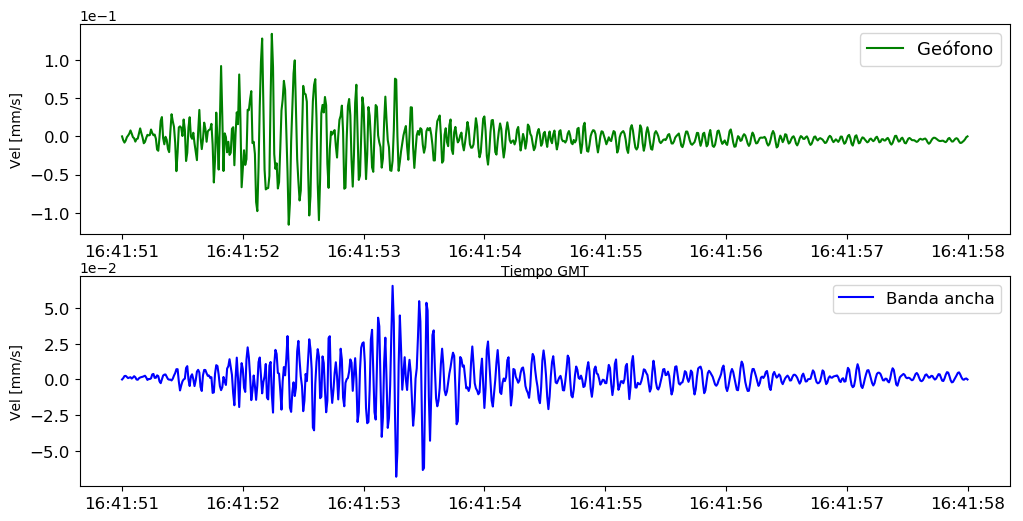

PyObject <matplotlib.legend.Legend object at 0x7fecd9a64da0>

In [7]:
fig = figure(figsize=(12,6))
subplot(2,1,2)
plot(ti,(bb.t)*1000,"b", label="Banda ancha")
ylabel("Vel [mm/s]")
xticks(fontsize=12)
yticks(fontsize=12)
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
legend(loc="best",fontsize=12)
subplot(2,1,1)
plot(ti,(geo.t)*1000,"g",label="Geófono")
xlabel("Tiempo GMT")
ylabel("Vel [mm/s]")
xticks(fontsize=12)
yticks(fontsize=12)
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
legend(loc="best",fontsize=13)

### Envolvente: Transformada de Hilbert

In [7]:
gh = abs.(hilbert(geo.t));
bh = abs.(hilbert(bb.t));

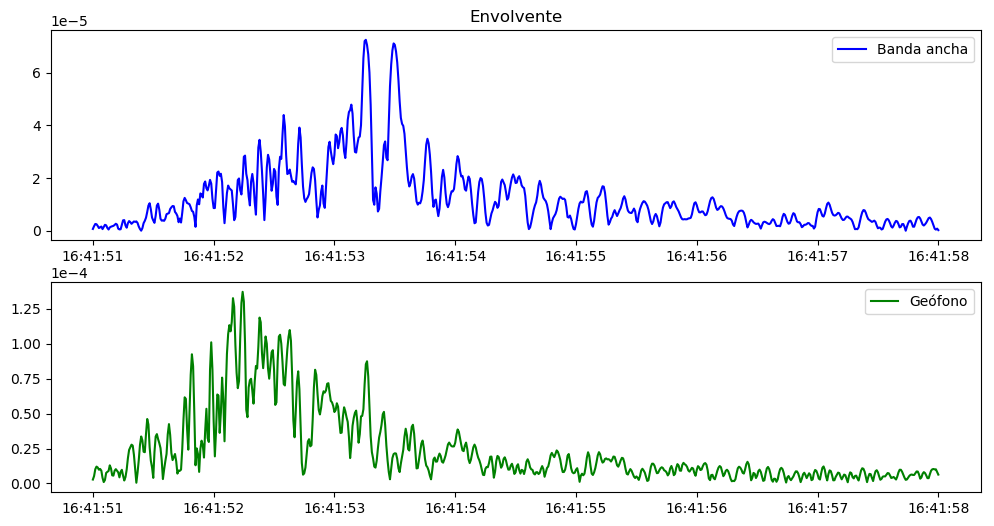

PyObject <matplotlib.legend.Legend object at 0x7f74559dfdd8>

In [97]:
fig = figure(figsize=(12,6))
subplot(2,1,2)
plot(ti,gh,"g",label="Geófono")
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
legend(loc="best")
subplot(2,1,1)
title("Envolvente")
plot(ti,bh,"b",label="Banda ancha")
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
legend(loc="best")

In [8]:
#Movil average function
function MA(x,n)
    if size(x,1)==1
        x = x'
    end
    y = zeros(length(x))
    sx = size(x,2)
    tape = NaN*(zeros(convert(Int,floor(n/2)),sx))
    x1 = [tape;x;tape]
    n1 = n-1
    for ii=1:size(y,1)
        sel = x1[ii+(0:n1),:]
        y[ii]=mean(sel[!isnan.(sel)]);
    end
    return y
end

MA (generic function with 1 method)

In [9]:
ghs = MA(gh,30);
bhs = MA(bh,30);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] !(::BitArray{2}) at ./deprecated.jl:57
 [3] MA(::Array{Float32,1}, ::Int64) at ./In[8]:13
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/marv/.julia/v0.6/IJulia/src/execute_request.jl:180
 [6] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/marv/.julia/v0.6/Compat/src/Compat.jl:332
 [7] eventloop(::ZMQ.Socket) at /home/marv/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##15#18)() at ./task.jl:335
while loading In[9], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] !(::BitArray{2}) at ./deprecated.jl:57
 [3] MA(::Array{Float32,1}, ::Int64) at ./In[8]:13
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/marv/.julia/v0.6/IJulia/src/execute_request.jl:180
 [6] (::Compat

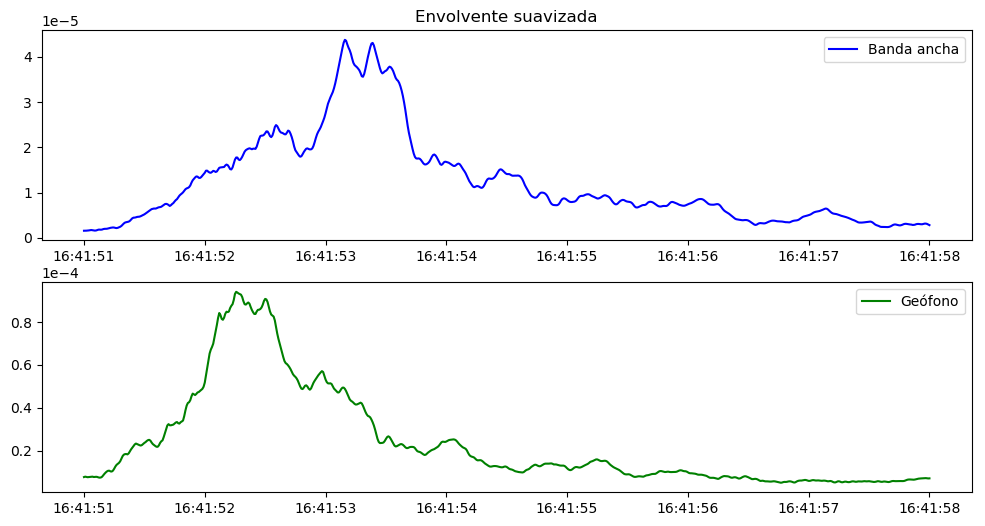

PyObject <matplotlib.legend.Legend object at 0x7f745569f438>

In [109]:
fig = figure(figsize=(12,6))
subplot(2,1,2)
plot(ti,ghs,"g",label="Geófono")
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
legend(loc="best")
subplot(2,1,1)
title("Envolvente suavizada")
plot(ti,bhs,"b",label="Banda ancha")
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
legend(loc="best")

### Envolvente y Método de Crampin, 1965
#### Energía sísmica radiada
### $ E_s = \int_{t_i}^{t_f} 2\pi r D hc u_{env}(t)^2 e ^{Br} dt $,
#### donde:
### $ r $ es la distancia entre el evento y la estación
### $ D $ densidad del medio de propagación
### $ h $ el espesor del estrato donde viajan las ondas superficiales
### $ c $ velocidad de fase
### $ u_{env}(t) $ es la envolvente de la señal sísmica
### $ Br $  parámetro de atenuación anelástica de las ondas sísmicas;
#### $ B_{ij} = \frac{log(A(r_{i})\sqrt{r_i})-log(A(r_{j}\sqrt{r_i})}{\sqrt{r_j}-\sqrt{r_i}}  $
### y
### $ u_{env}(t) = \sqrt{u(t)^2+Ht(u(t))^2} $,
#### Donde;
### $ u(t) $ es la señal sísmica
### $ Ht(u(t)) $ es la envolvente se la señal sísmica generada con la transformada de Hilbert

In [10]:
ug = (geo.t).^2;
uge = gh.^2;
u_e = sqrt(ug+uge);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sqrt(::Array{Float32,1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/marv/.julia/v0.6/IJulia/src/execute_request.jl:180
 [5] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/marv/.julia/v0.6/Compat/src/Compat.jl:332
 [6] eventloop(::ZMQ.Socket) at /home/marv/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##15#18)() at ./task.jl:335
while loading In[10], in expression starting on line 3


In [11]:
ub = (bb.t).^2;
ubb = bh.^2;
u_eb = sqrt(ub+ubb);

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] sqrt(::Array{Float32,1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/marv/.julia/v0.6/IJulia/src/execute_request.jl:180
 [5] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/marv/.julia/v0.6/Compat/src/Compat.jl:332
 [6] eventloop(::ZMQ.Socket) at /home/marv/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##15#18)() at ./task.jl:335
while loading In[11], in expression starting on line 3


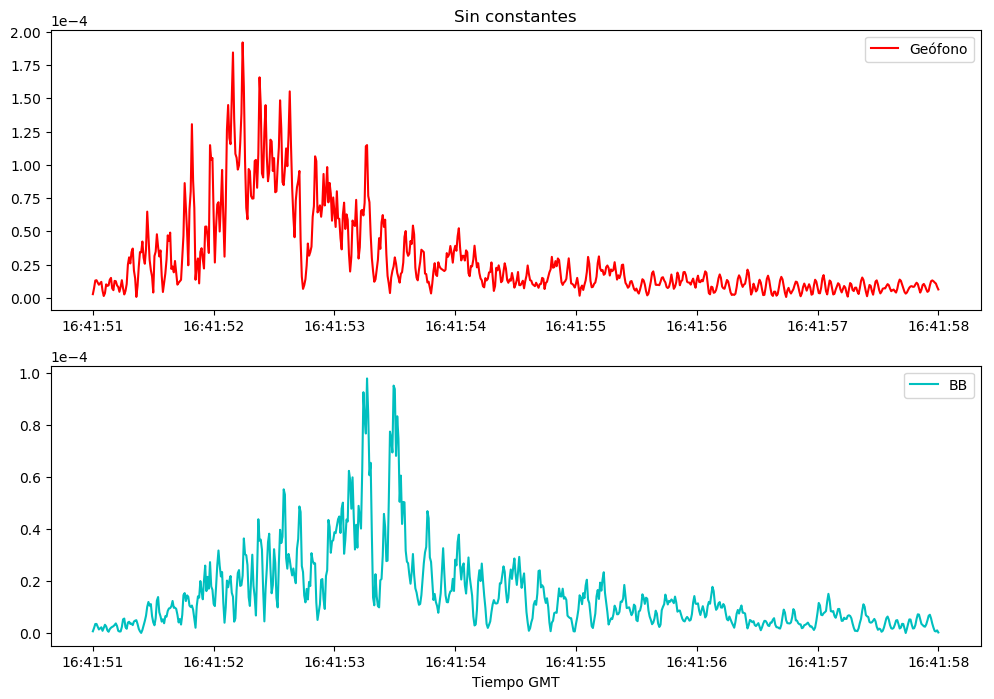

PyObject <matplotlib.legend.Legend object at 0x7f5645e0d588>

In [21]:
fig = figure(figsize=(12,8))
subplot(2,1,1)
title("Sin constantes")
plot(ti,u_e,"r", label="Geófono")
ticklabel_format(format="sci", axis="y",scilimits=(0,0),fontsize=13)
legend(loc="best")
subplot(2,1,2)
plot(ti,u_eb,"c", label="BB")
xlabel("Tiempo GMT")
ticklabel_format(format="sci", axis="y",scilimits=(0,0),fontsize=13)
legend(loc="best")

### Si $ Br $ tiende a 0;
### $ E_s = 2 \pi \cdot 270.57m \cdot 2,322.7 \frac{kg}{m^3} \cdot 300 \frac {m}{s} u_{env}(t)^2 $ Geófono
### $ E_s = 2 \pi \cdot 490m \cdot 2,322.7 \frac{kg}{m^3} \cdot 300 \frac {m}{s} u_{env}(t)^2 $ Banda ancha

In [21]:
# h calculada como 300/11=27
cg = 2*3.1416*270.57*2322.7*300*27.27
e_sg = cg.*u_e;

In [12]:
#h del paper de Hibert = 15
cg2 = 2*3.1416*270.57*2322.7*300*15
e_sg2 = cg2.*u_e;

In [17]:
#h=27
cb = 2*3.1416*491.99*2322.7*300*27.27
e_sb = cb.*u_eb;

In [18]:
#h=15
cb2 = 2*3.1416*491.99*2322.7*300*15
e_sb2 = cb2.*u_eb;

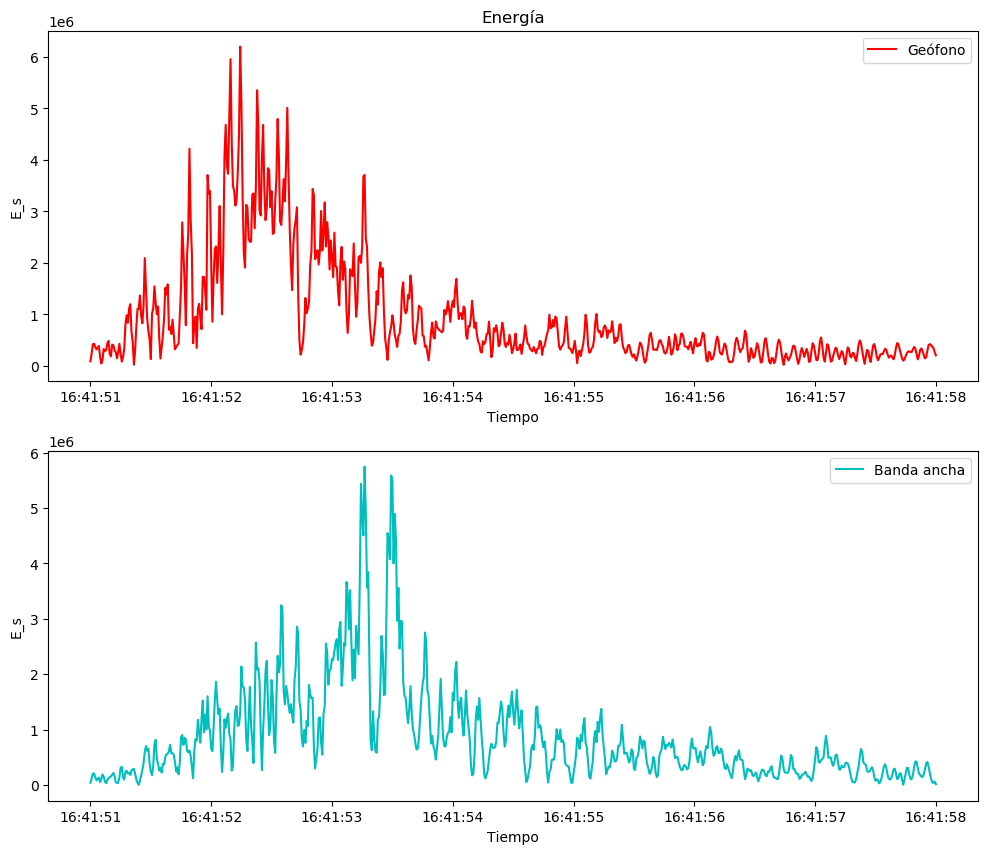

PyObject <matplotlib.legend.Legend object at 0x7f6256b3e748>

In [22]:
fig = figure(figsize=(12,10))
subplot(2,1,1)
plot(ti,e_sg,"r",label="Geófono")
title("Energía")
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
xlabel("Tiempo")
ylabel("E_s")
legend(loc="best")
subplot(2,1,2)
plot(ti,e_sb,"c",label="Banda ancha")
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
xlabel("Tiempo")
ylabel("E_s")
legend(loc="best")

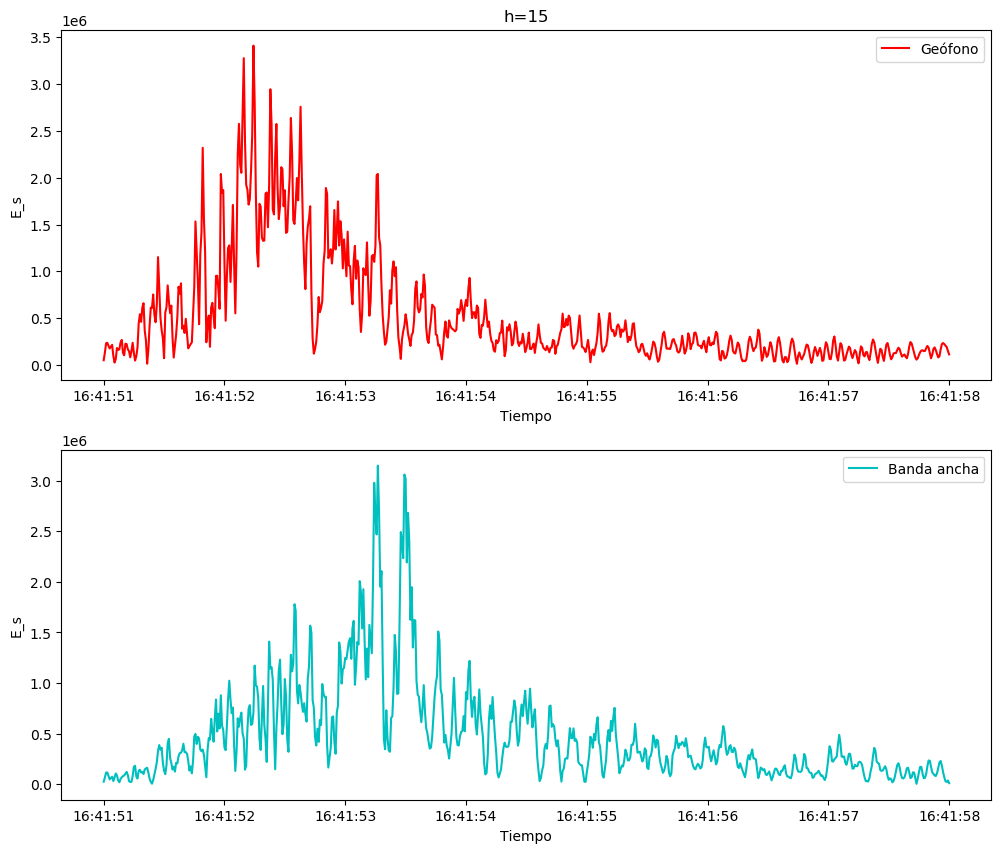

PyObject <matplotlib.legend.Legend object at 0x7f6256b38f60>

In [16]:
fig = figure(figsize=(12,10))
subplot(2,1,1)
plot(ti,e_sg2,"r",label="Geófono")
title("h=15")
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
xlabel("Tiempo")
ylabel("E_s")
legend(loc="best")
subplot(2,1,2)
plot(ti,e_sb2,"c",label="Banda ancha")
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
xlabel("Tiempo")
ylabel("E_s")
legend(loc="best")

In [26]:
#h=27 y factor de atenuación
cg3 = (2*3.1416*270.57*2322.7*300*27.27)*(2.718^(0.0006*270.57))
e_sg3 = cg3.*u_e;

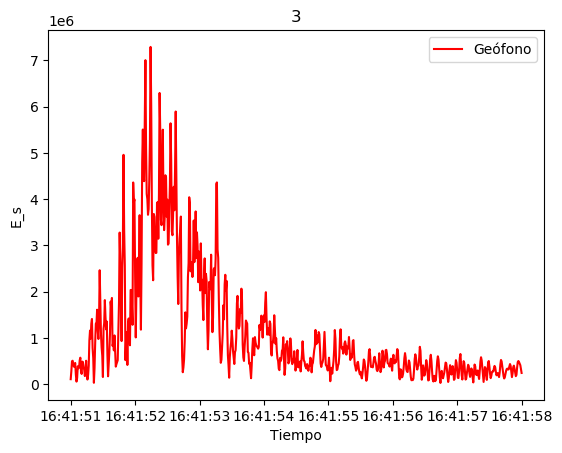

PyObject <matplotlib.legend.Legend object at 0x7f62568fe978>

In [27]:
plot(ti,e_sg3,"r",label="Geófono")
title("3")
ticklabel_format(format="sci",axis="y",scilimits=(0,0),fontsize=11)
xlabel("Tiempo")
ylabel("E_s")
legend(loc="best")

## Filtro Butterworth

In [13]:
gf = Bandpass(1,49,fs=100)
des = Butterworth(4)
fig = filt(digitalfilter(gf,des),geo.t);
fib = filt(digitalfilter(gf,des),bb.t);

## fft

In [9]:
ffg = abs.(fft(fig,1));
ffb = abs.(fft(fib,1));

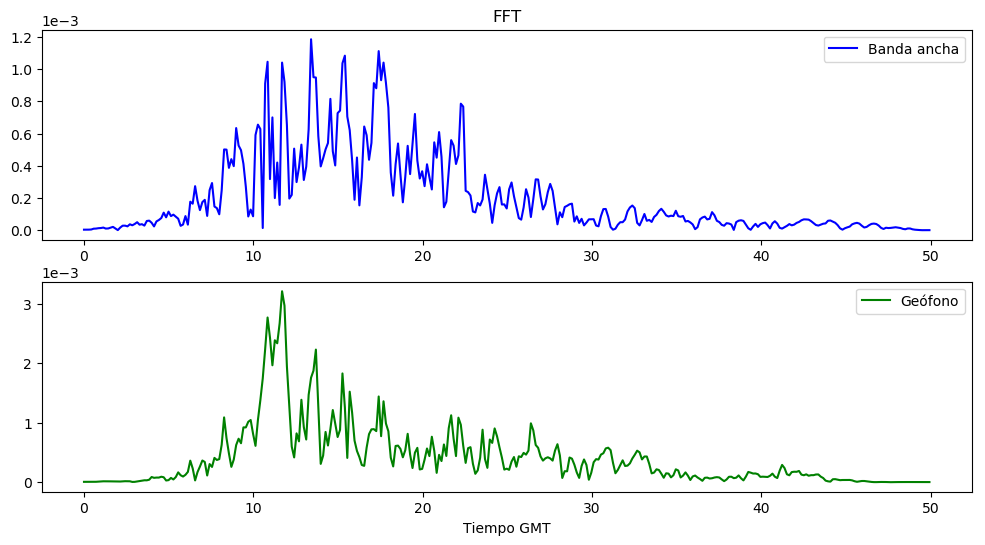

PyObject <matplotlib.legend.Legend object at 0x7f1134d11ef0>

In [41]:
fig = figure(figsize=(12,6))
subplot(2,1,1)
title("FFT")
plot(fb[1:n2],ffb[1:n2],"b",label="Banda ancha")
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
legend(loc="best")
subplot(2,1,2)
plot(fg[1:n1],ffg[1:n1],"g",label="Geófono")
xlabel("Frecuencia [Hz]")
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
legend(loc="best")

## Welch

In [14]:
wb = welch_pgram(fib,fs=100);
wg = welch_pgram(fig,fs=100);

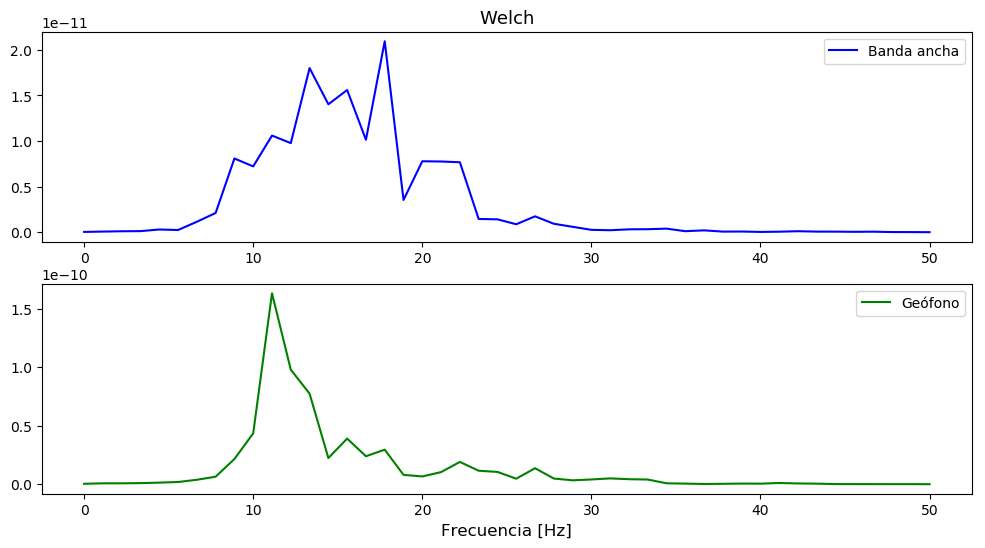

PyObject <matplotlib.legend.Legend object at 0x7f7456fc09b0>

In [32]:
fig = figure(figsize=(12,6))
subplot(2,1,1)
title("Welch", fontsize=13)
plot(wb.freq,wb.power,"b",label="Banda ancha")
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
legend(loc="best")
subplot(2,1,2)
plot(wg.freq,wg.power,"g",label="Geófono")
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
xlabel("Frecuencia [Hz]",fontsize=12)
legend(loc="best")

## Multitaper

In [10]:
mg = mt_pgram(fig,fs=100);
mb = mt_pgram(fib,fs=100);

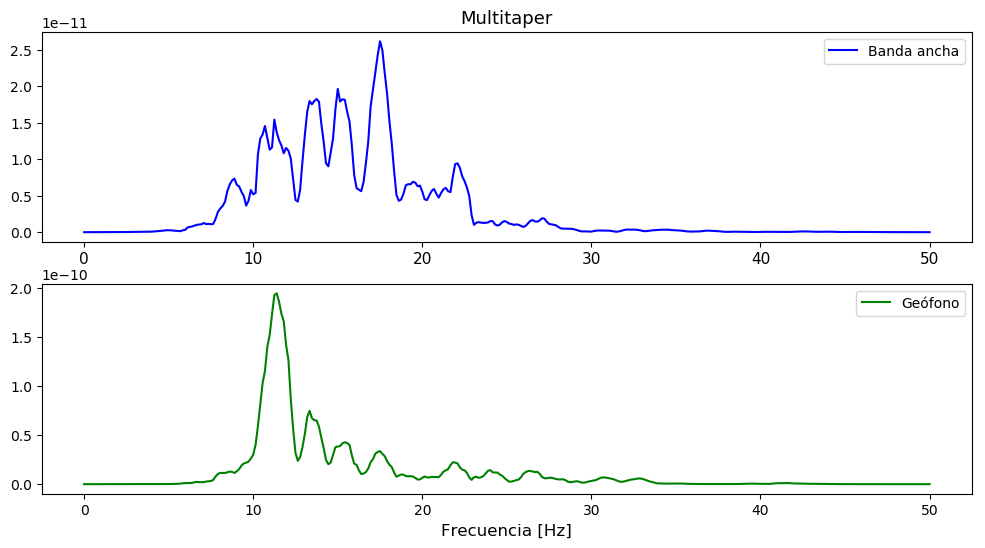

PyObject <matplotlib.legend.Legend object at 0x7f7456b9a358>

In [33]:
fig = figure(figsize=(12,6))
subplot(2,1,1)
title("Multitaper", fontsize=13)
plot(mb.freq,mb.power,"b",label="Banda ancha")
xticks(fontsize=11)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
legend(loc="best")
subplot(2,1,2)
plot(mg.freq,mg.power,"g",label="Geófono")
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
xlabel("Frecuencia [Hz]", fontsize=12)
legend(loc="best")

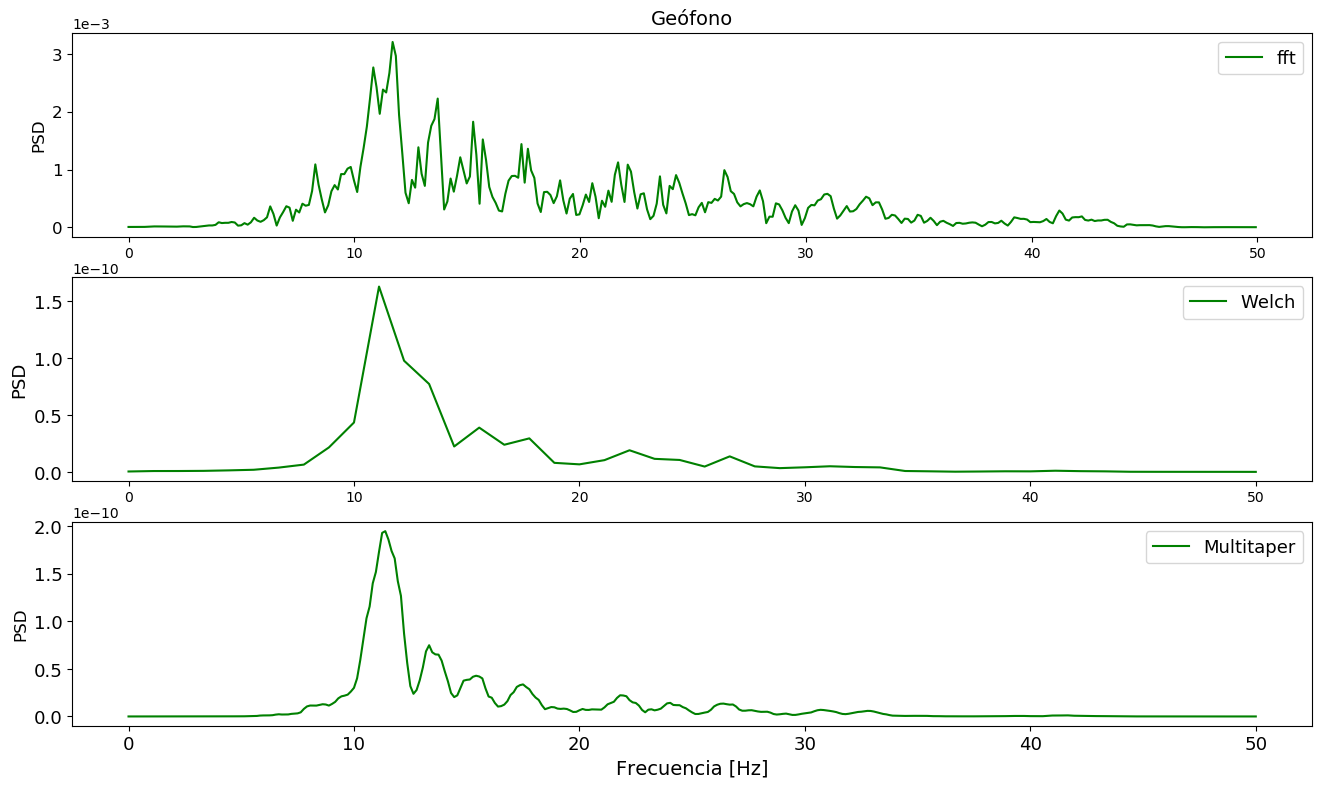

PyObject <matplotlib.legend.Legend object at 0x7fecd4fa6cf8>

In [18]:
fig = figure(figsize=(16,9))
subplot(3,1,1)
title("Geófono",fontsize=14)
plot(fg[1:n1],ffg[1:n1],"g",label="fft")
yticks(fontsize=12)
ylabel("PSD",fontsize=12)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
legend(loc="best",fontsize=13)
subplot(3,1,2)
plot(wg.freq,wg.power,"g",label="Welch")
yticks(fontsize=13)
ylabel("PSD",fontsize=13)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
legend(loc="best",fontsize=13)
subplot(3,1,3)
plot(mg.freq,mg.power,"g",label="Multitaper")
xticks(fontsize=13)
yticks(fontsize=13)
ylabel("PSD",fontsize=12)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
xlabel("Frecuencia [Hz]", fontsize=14)
legend(loc="best",fontsize=13)

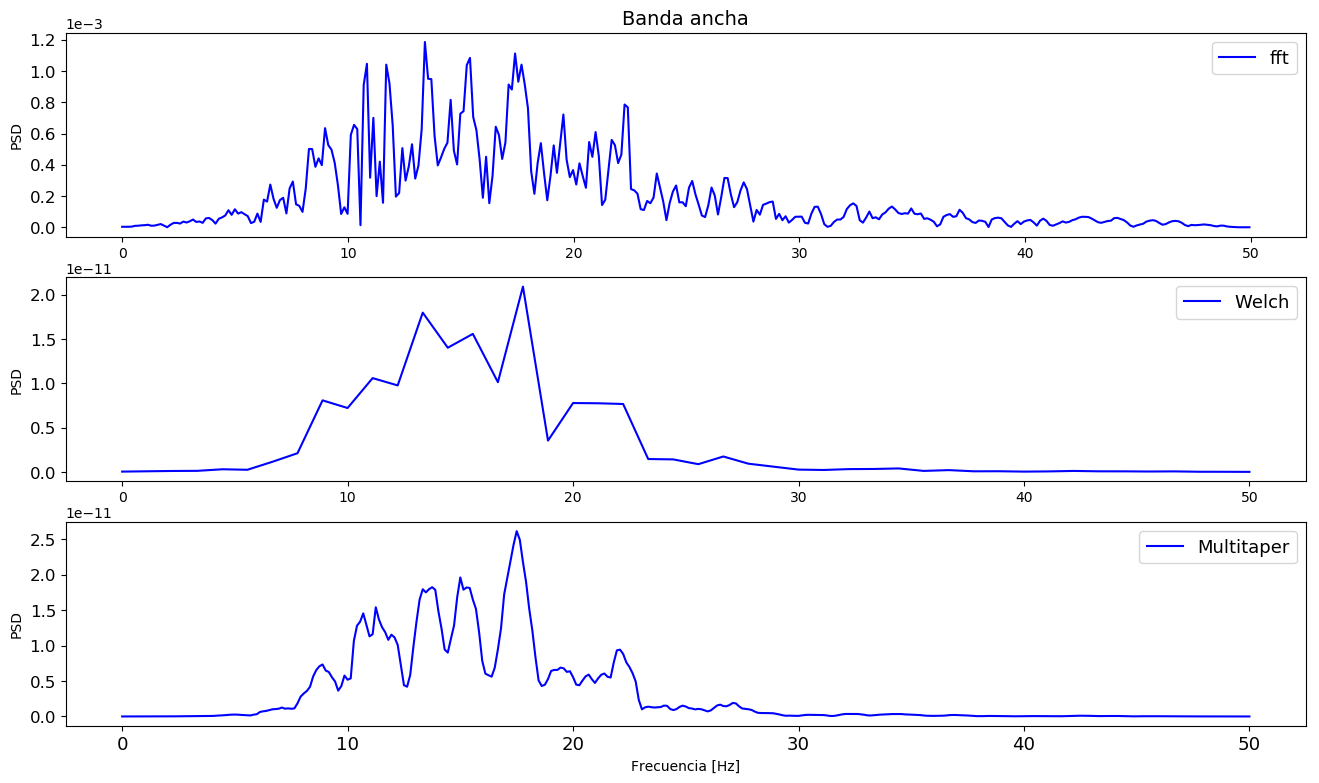

PyObject <matplotlib.legend.Legend object at 0x7fecd4c4f080>

In [21]:
fig = figure(figsize=(16,9))
subplot(3,1,1)
title("Banda ancha", fontsize=14)
plot(fb[1:n2],ffb[1:n2],"b",label="fft")
ylabel("PSD")
yticks(fontsize=12)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
legend(loc="best", fontsize=13)

subplot(3,1,2)
plot(wb.freq,wb.power,"b",label="Welch")
ylabel("PSD")
yticks(fontsize=12)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
legend(loc="best", fontsize=13)

subplot(3,1,3)
plot(mb.freq,mb.power,"b",label="Multitaper")
xlabel("Frecuencia [Hz]")
xticks(fontsize=13)
ylabel("PSD")
yticks(fontsize=12)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
legend(loc="best",fontsize=13)


### Tiempo-frecuencia: Espectrograma

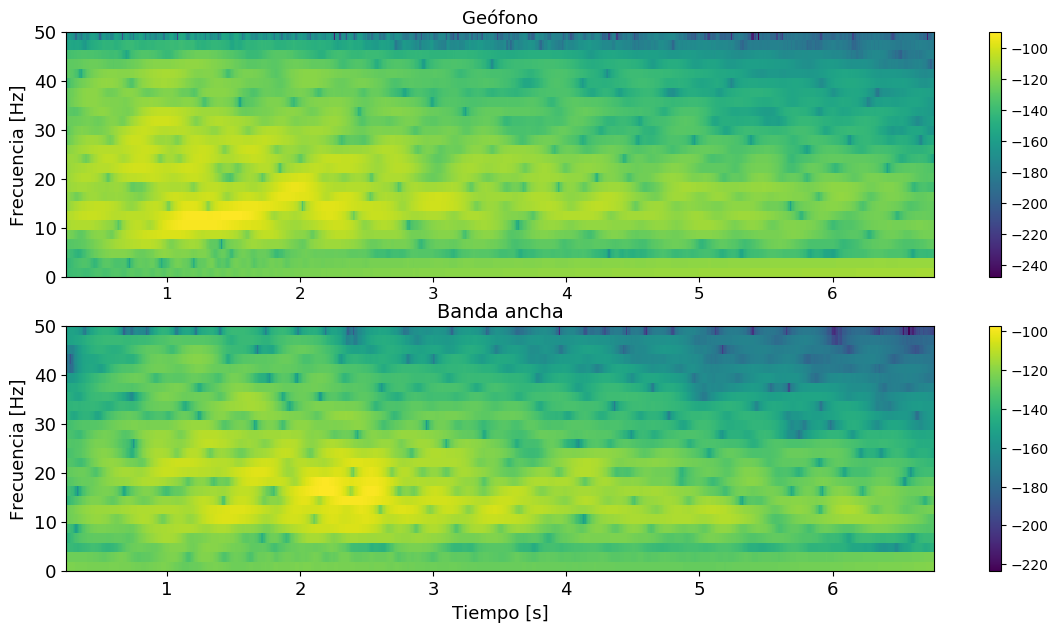

PyObject <matplotlib.colorbar.Colorbar object at 0x7f745530c8d0>

In [146]:
fig = figure(figsize=(14,7))
subplot(2,1,1)
title("Geófono", fontsize=13)
specgram(geo.t,50,100,pad_to=50,noverlap=49, label="Geófono")
xticks(fontsize=12)
ylabel("Frecuencia [Hz]", fontsize=13)
yticks(fontsize=13)
PyPlot.colorbar()
subplot(2,1,2)
specgram(bb.t,50,100,pad_to=50,noverlap=49)
title("Banda ancha", fontsize=14)
xlabel("Tiempo [s]", fontsize=13)
xticks(fontsize=13)
ylabel("Frecuencia [Hz]", fontsize=13)
yticks(fontsize=13)
PyPlot.colorbar()

## Cálculo algebraico de energía cinética y potencial
#### Energía cinética
$ E_k = \frac{1}{2} m \cdot V^2  $
#### Energía potencial
$ E_p = m \cdot g \cdot h   $

### Con los valores:
#### $ V = 2 m/s $ (calculada con el video)
#### $ m \approx 4103.75 kg $  (con 30% de porosidad)-- ¡no lab! ..yet.
#### $ m \approx 5388.45 kg $ con $ \rho $ medida en lab
#### $ h = 3.40m $ (medida en campo)

## $ E_k = 10776.9 \frac{kg \cdot m^2}{s^2} $
## $ E_p = 179726.3 \frac{kg \cdot m^2}{s^2} $

In [42]:
Ek = 0.5*4103.75*(2^2)

8207.5

In [43]:
Ep = 4103.75*9.81*3.40

136876.47749999998

In [2]:
Ekl = 0.5*5388.45*4

10776.9

In [3]:
Epl = 5388.45*9.81*3.40

179726.3613

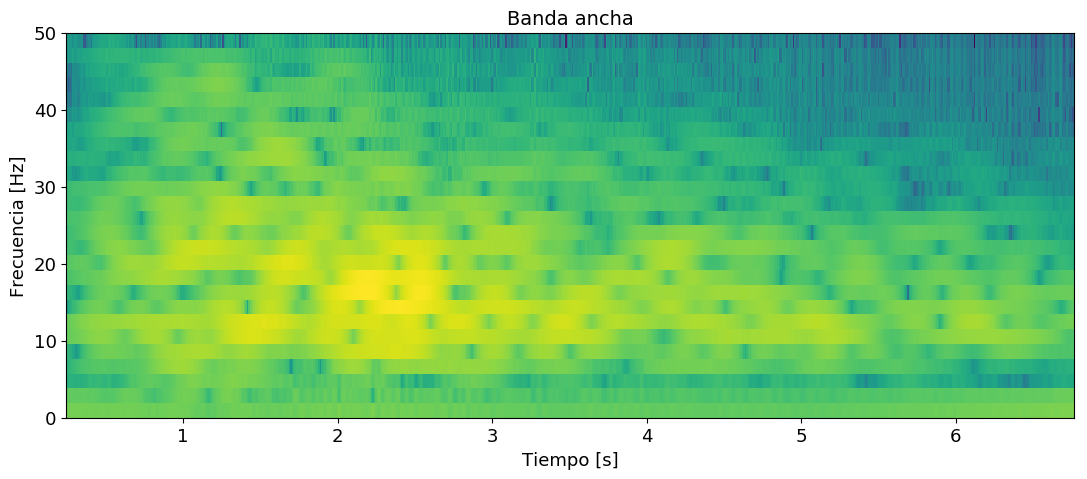

([0.0, 10.0, 20.0, 30.0, 40.0, 50.0], PyCall.PyObject[PyObject Text(0,0,'0'), PyObject Text(0,10,'10'), PyObject Text(0,20,'20'), PyObject Text(0,30,'30'), PyObject Text(0,40,'40'), PyObject Text(0,50,'50')])

In [21]:
fig = figure(figsize=(13,5))
specgram(bb.t,50,100,pad_to=50,noverlap=49,window=hamming(50))
title("Banda ancha", fontsize=14)
xlabel("Tiempo [s]", fontsize=13)
xticks(fontsize=13)
ylabel("Frecuencia [Hz]", fontsize=13)
yticks(fontsize=13)

In [32]:
esp = stft(bb.t);

46×14 Array{Complex{Float32},2}:
           9.27889f-5+0.0im  …           0.000112817+0.0im
 -2.09273f-5-9.04342f-6im         3.18193f-7+7.4206f-6im  
 -2.17982f-5-1.45115f-5im        2.21385f-6+3.99337f-6im  
  -6.29633f-6-2.5751f-5im        9.82101f-7+3.35086f-6im  
  8.34884f-6-1.71027f-5im         2.52794f-7+5.7268f-6im  
  5.93322f-6-2.19939f-5im    …   8.55869f-6+8.72181f-6im  
  -2.7818f-6+2.32901f-6im        6.56251f-6+2.69408f-6im  
  1.56584f-6-4.63468f-5im        1.16716f-5-6.38105f-6im  
  4.16562f-5-3.11395f-6im        1.36622f-5+3.41363f-5im  
   7.7393f-7+4.15506f-6im       -4.89684f-5+8.12323f-5im  
   7.29397f-5+7.7029f-5im    …   7.34659f-5-8.24138f-5im  
 -9.82543f-5+1.14313f-5im        -3.4042f-5+1.15574f-5im  
   -2.365f-5-3.00003f-5im       0.000102329+7.95566f-6im  
                     ⋮       ⋱                            
  2.48406f-6-7.11434f-6im        7.57666f-7-3.72835f-6im  
  1.64504f-5+1.22064f-5im    …    8.68771f-7-2.8661f-6im  
 -6.58714f-6+1.79754f-5